In [1]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

In [2]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [3]:
df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [4]:
df.tail()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
81,86,W,Vienne,15010,4710,25,8922,35224,21851,2:Med,...,20,1,44,40,38,65,18,170.523,6990,282.73
82,87,C,Haute-Vienne,16256,6402,13,13817,19940,33497,2:Med,...,68,6,78,55,11,84,7,198.874,5520,285.13
83,88,E,Vosges,18835,9044,62,4040,14978,33029,2:Med,...,58,34,5,14,85,11,43,174.477,5874,397.99
84,89,C,Yonne,18006,6516,47,4276,16616,12789,2:Med,...,32,22,35,51,66,27,272,81.797,7427,352.49
85,200,NaN,Corse,2199,4589,49,37015,24743,37016,2:Med,...,81,2,84,83,9,25,1,539.213,8680,195.41


In [5]:
selective = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']

In [6]:
selective

['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']

In [7]:
df = df[selective]

In [8]:
df.head()

,Department,Lottery,Literacy,Wealth,Region
0,Ain,41,37,73,E
1,Aisne,38,51,22,N
2,Allier,66,13,61,C
3,Basses-Alpes,80,46,76,E
4,Hautes-Alpes,79,69,83,E


In [9]:
df.tail()

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


In [10]:
# drop na

df = df.dropna()

In [11]:
df.tail()

,Department,Lottery,Literacy,Wealth,Region
80,Vendee,68,28,56,W
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C


In [12]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')

In [13]:
y.tail()

,Lottery
80,68.0
81,40.0
82,55.0
83,14.0
84,51.0


In [14]:
y.head()

,Lottery
0,41.0
1,38.0
2,66.0
3,80.0
4,79.0


In [15]:
y[:3]

,Lottery
0,41.0
1,38.0
2,66.0


In [16]:
X[:4]

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0
3,1.0,1.0,0.0,0.0,0.0,46.0,76.0


In [17]:
# Model fit and Summary

model = sm.OLS(y, X)

In [18]:
res = model.fit()

In [19]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           1.07e-05
Time:                        12:56:25   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [20]:
# Check res params

res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [21]:
# Check rsquared

res.rsquared

0.337950869192882

In [22]:
# Rainbow test

sm.stats.linear_rainbow(res)

(0.8472339976156916, 0.6997965543621643)

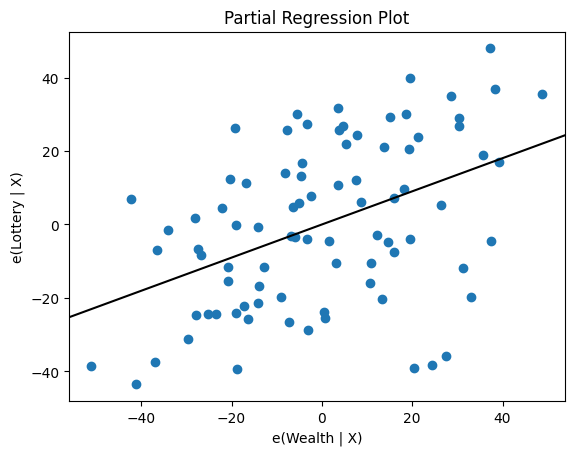

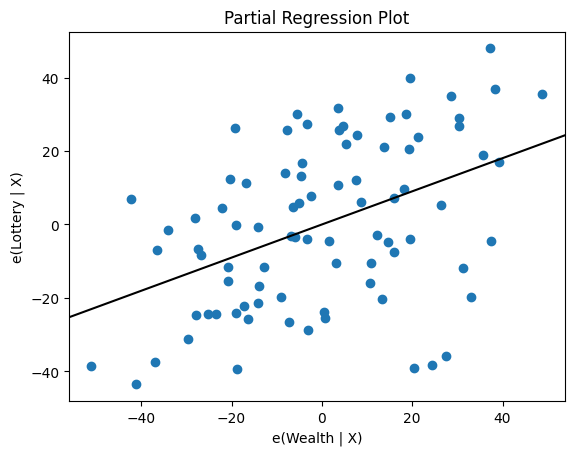

In [23]:
# Plot 

sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region' ,'Literacy'], data=df, obs_labels = False)